In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Task 1.1: Develop a line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [6]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

In [7]:
df_line

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990     917.275000
1991     655.891667
1992    1647.700000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    1286.791667
2001     692.133333
2002    1783.216667
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    1289.550000
2009     631.691667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

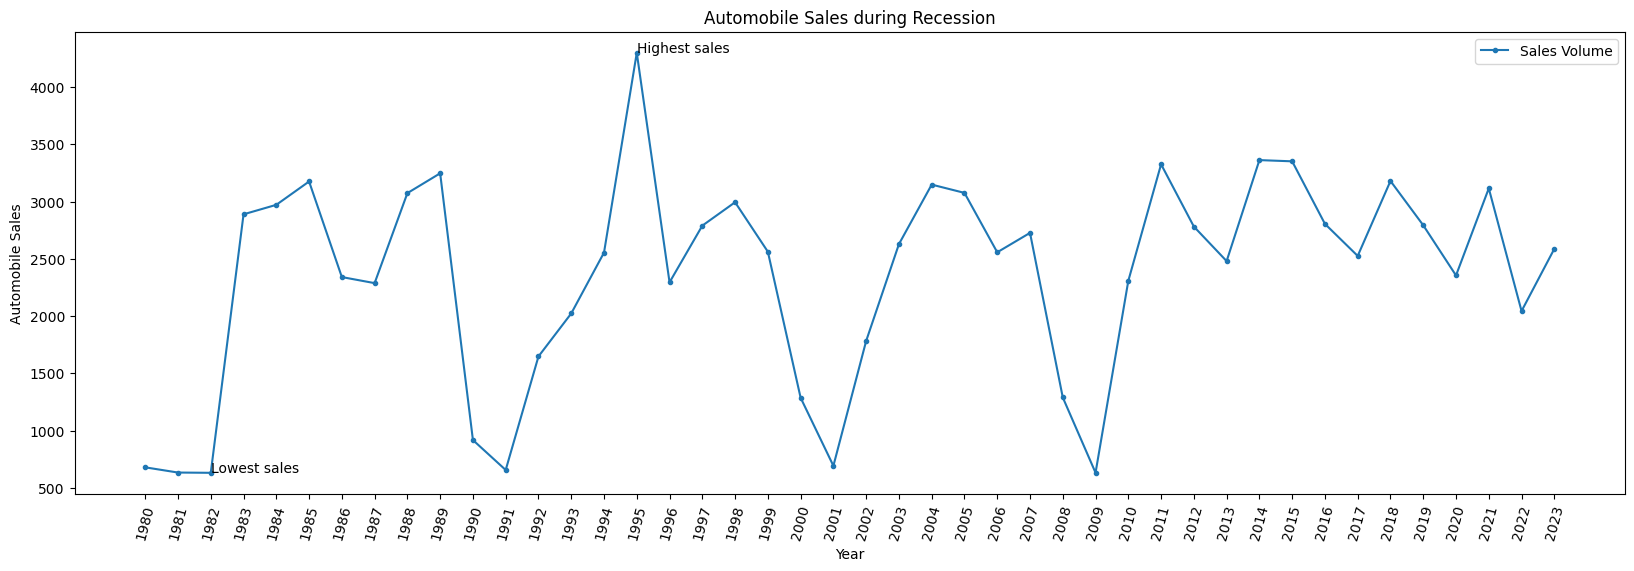

In [8]:
plt.figure(figsize=(20,6))
df_line.plot(kind='line', label='Sales Volume', marker='.')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 631, 'Lowest sales')
plt.text(1995, 4300, 'Highest sales')
plt.legend()
plt.show()

### Task 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question 'is there a noticeable difference in sales trends between different vehicle types during recession periods'?

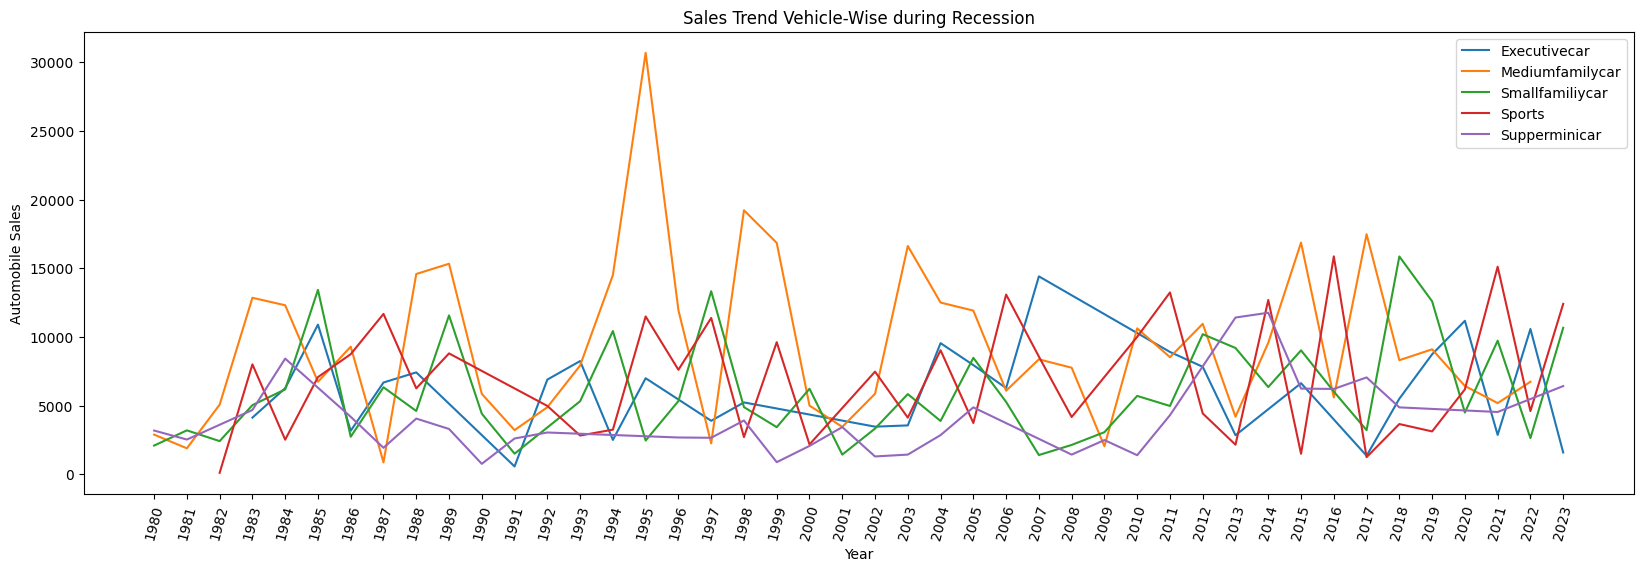

In [9]:
df_line2 = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_line2.set_index('Year', inplace=True)
df_line2 = df_line2.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(20,6))
df_line2.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-Wise during Recession')
plt.legend()
plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types? Type in your answer below.

From the chart above, sports car have been the lowest sales volumes during 1982 (2nd recession period). During the beginning of 2007 (the 5th recession period), the executive car and medium family car sold higher than the sports car. 

### Task 1.3: Use the functionality of Seaborn library to create a visualisation to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [10]:
df_bar = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean().reset_index()
df_bar

,index,Recession,Vehicle_Type,Automobile_Sales
0,0,0,Executivecar,2686.436232
1,1,0,Mediumfamilycar,2981.501935
2,2,0,Smallfamiliycar,2752.658140
3,3,0,Sports,2910.636264
4,4,0,Supperminicar,2495.242222
5,5,1,Executivecar,564.000000
6,6,1,Mediumfamilycar,674.847619
7,7,1,Smallfamiliycar,650.733333
8,8,1,Sports,170.333333
9,9,1,Supperminicar,659.270968


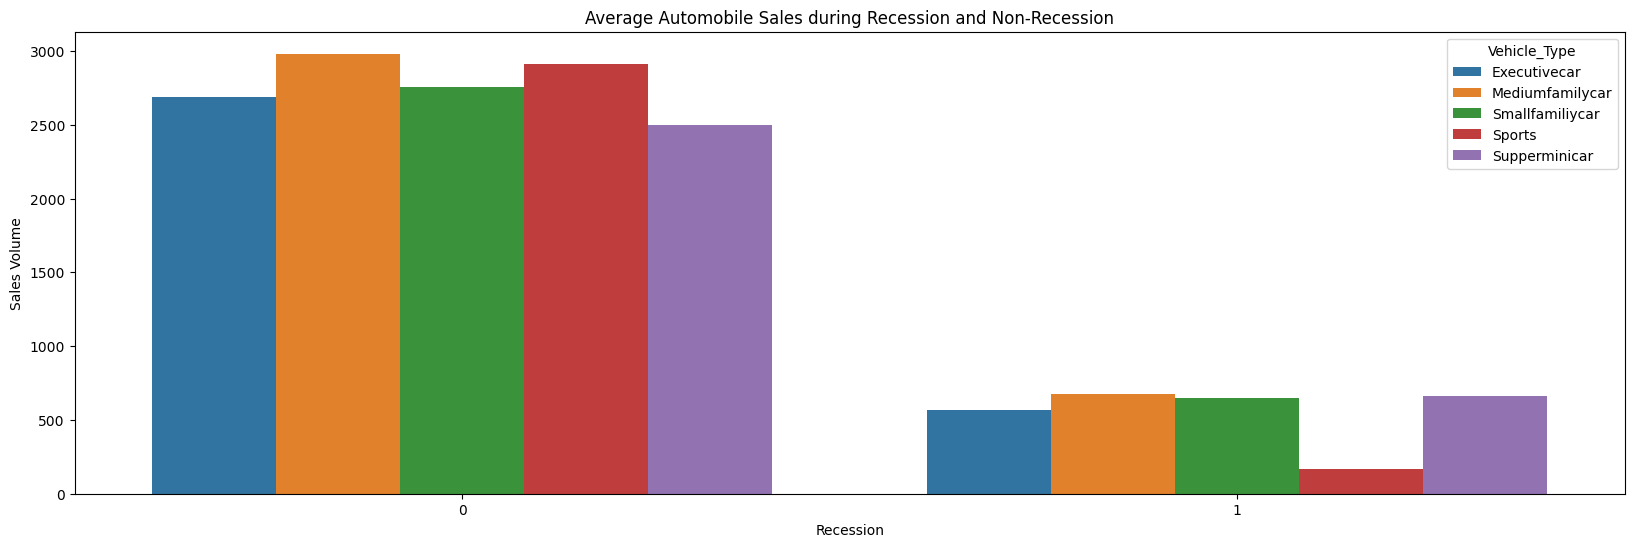

In [11]:
plt.figure(figsize=(20,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df_bar)
plt.xlabel('Recession')
plt.ylabel('Sales Volume')
plt.title('Average Automobile Sales during Recession and Non-Recession')
#plt.xticks(label='Vehicle_Type')
plt.show()

#### Type your inference below. What insights have you gained on the overall sales of automobiles during recession?

Recession sales are much lower than sales on non-recession periods across all vehicle types. 

### Task 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

In [12]:
rec_data = df[df['Recession'] == 1]
rec_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


In [13]:
non_rec_data = df[df['Recession'] == 0]
non_rec_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


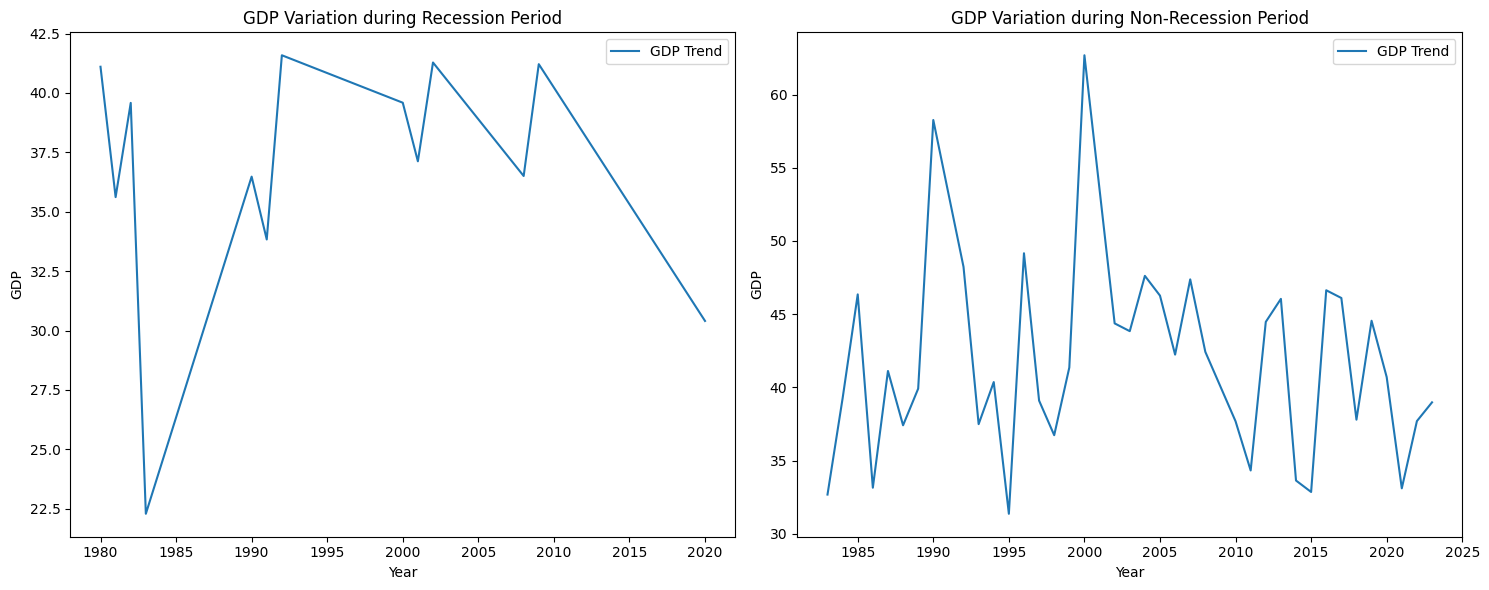

In [14]:
fig = plt.figure(figsize=(15, 6))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# 1st plot
sns.lineplot(x='Year', y='GDP', data=rec_data, label='GDP Trend', errorbar=None, ax=ax0) #errorbar removes the shading because sns.lineplot() will estimate the mean by aggregating
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
# 2nd plot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='GDP Trend', errorbar=None, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

### Task 1.5: Develop a bubble plot for displaying the impact of seasonality on automobile sales.

In [15]:
#df_bub = df.groupby('Month')['Seasonality_Weight','Automobile_Sales'].sum().reset_index() #reset index and use this to sort out the dataframe by month
df_bub = df.groupby(['Month', 'Seasonality_Weight'])['Automobile_Sales'].sum().reset_index()

#sort out index by month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_bub.index=pd.CategoricalIndex(df_bub['Month'],categories=months, ordered=True)
df_bub=df_bub.sort_index().reset_index(drop=True)

df_bub

,Month,Seasonality_Weight,Automobile_Sales
0,Jan,0.50,100256.60
1,Feb,0.75,102288.70
2,Mar,0.20,5949.70
3,Mar,1.50,100737.14
4,Apr,1.00,108967.20
5,May,0.20,6267.60
6,May,1.50,95344.10
7,Jun,0.75,102850.40
8,Jul,0.50,101211.60
9,Aug,0.25,97429.00


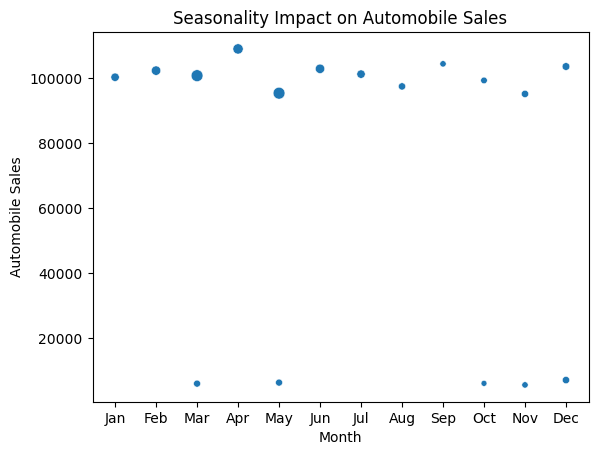

In [16]:
sns.scatterplot(data=df_bub, x='Month', y='Automobile_Sales', size='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

#### Inference

From this plot, it is evident that seasonality has not affected the overall sales. However, there is a drastic raise in sales in the month of April.

### Task 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

#### From the data, develop a scatter plot to identify if there is a correlation between consumer confidence and automobile sales during recession period.

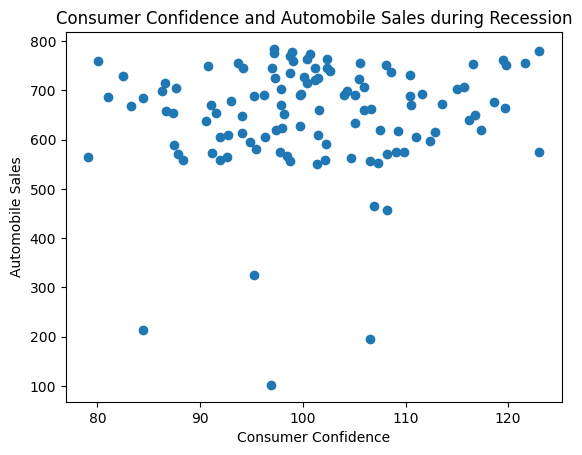

In [17]:
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('Consumer Confidence')
    plt.ylabel('Automobile Sales')
    plt.title('Consumer Confidence and Automobile Sales during Recession')
    plt.show()

#### How does the average vehicle price relate to the sales volume during recessions?

Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recession'.

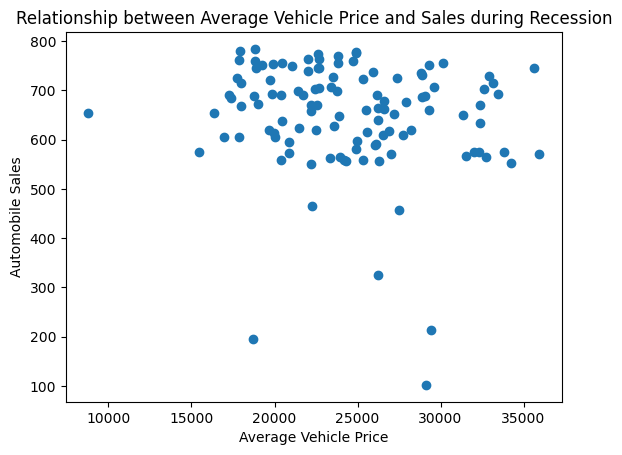

In [18]:
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recession')
plt.show()

#### Inference

There is not much relation.

### Task 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

In [19]:
# calculate total advertising cost for both periods
RATotal = rec_data['Advertising_Expenditure'].sum()
NRATotal = non_rec_data['Advertising_Expenditure'].sum()

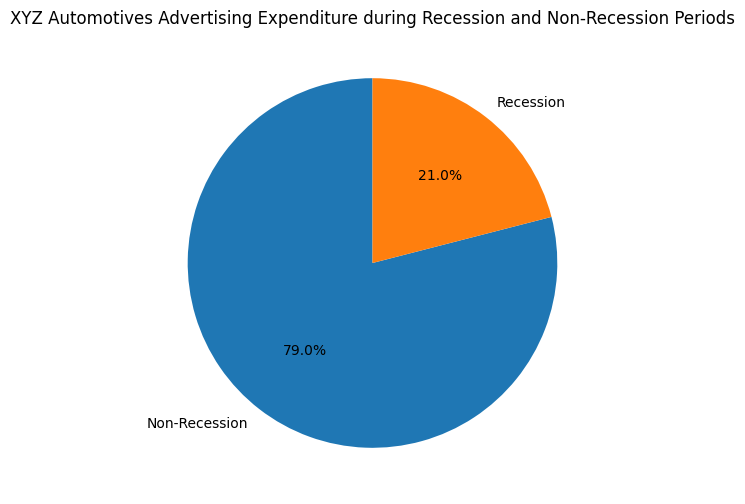

In [20]:
plt.figure(figsize=(8,6))

labels = ['Non-Recession', 'Recession']
sizes = [NRATotal, RATotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('XYZ Automotives Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

In [21]:
# to validate that the pie chart is showing the correct values
sum1=df.groupby('Recession')['Advertising_Expenditure'].sum()
sum1

Recession
0    1279707
1     339910
Name: Advertising_Expenditure, dtype: int64

#### From the above plot, what insights do you find on the advertisement expenditure during recession and non-recession periods?

XYZ Automotives is able to spend much more on advertisements during non-recession periods compared to recession periods. It's 80% compared to only 20% during non-recession!

### Task 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

In [22]:
VT_sales = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
VT_sales

Vehicle_Type
Executivecar         3243
Mediumfamilycar    130612
Smallfamiliycar    102759
Sports              12568
Supperminicar       90728
Name: Advertising_Expenditure, dtype: int64

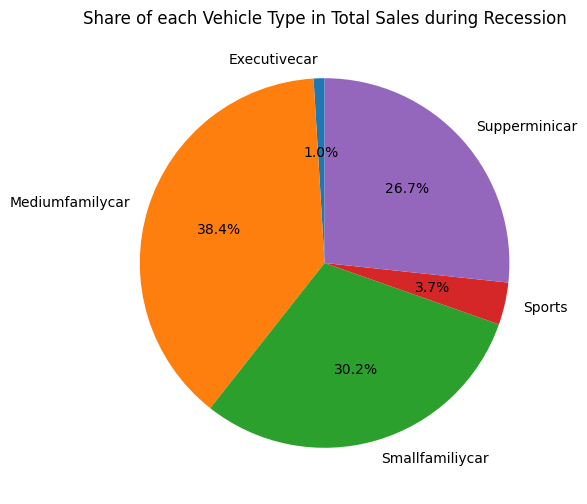

In [23]:
plt.figure(figsize=(8,6))

labels1 = VT_sales.index
sizes1 = VT_sales.values
plt.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90)

plt.title('Share of each Vehicle Type in Total Sales during Recession')

plt.show()

#### Inference

During recession, the advertisements were mostly focussed on low-priced range vehicle. 

### Task 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during recession.

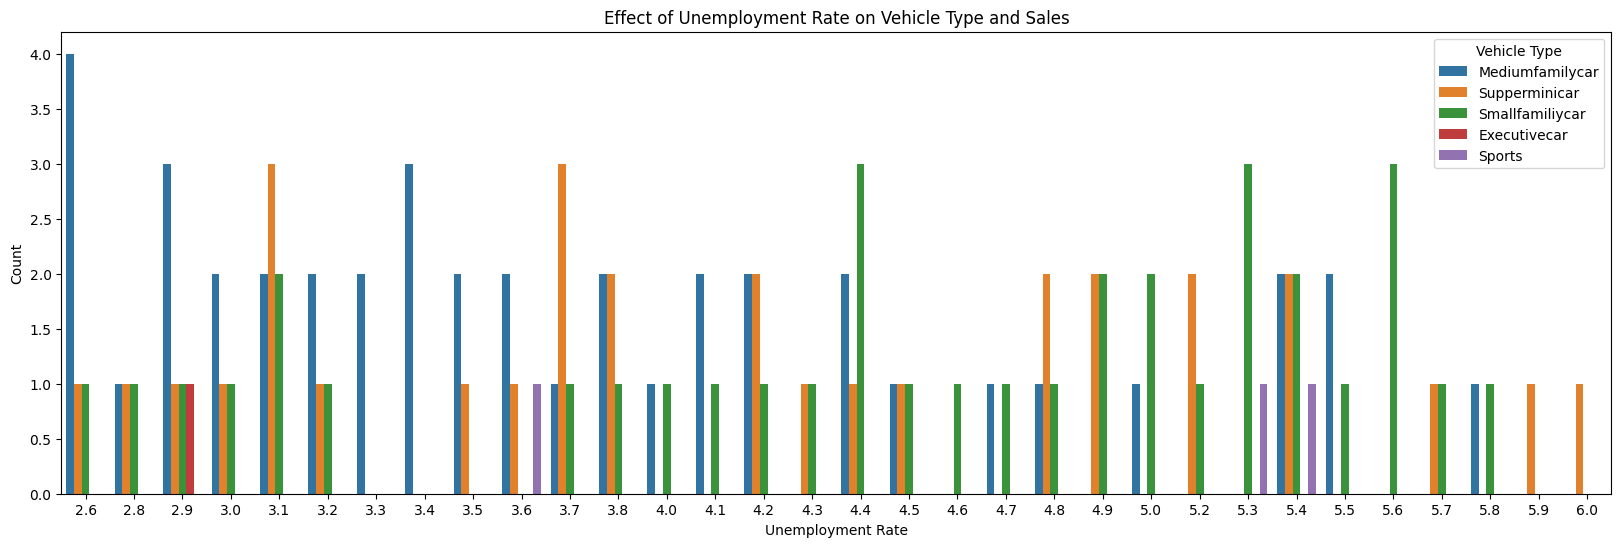

In [24]:
plt.figure(figsize=(20,6))

sns.countplot(data=rec_data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(title='Vehicle Type', loc='upper right')
plt.show()

#### From the above plot, what insights have you gained on sales of superminicar, smallfamilycar and mediumfamilycar?

Sales of these vehicle types have progressively become lower and lower as unemployment rate increases. However, they are much consistently much higher than the more expensive counterparts - executive and sports.

### Optional: Task 1.10: Create a map on the highest sales region/offices of the company during recession period.

In [25]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [26]:
usstatesdf = pd.read_csv(filename)

In [27]:
usstatesdf.head()

,"{""type"":""FeatureCollection""","features:[{""type"":""Feature""","id:""AL""","properties:{""name"":""Alabama""}","geometry:{""type"":""Polygon""",coordinates:[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,...,[-111.047063.5,40.998429].9,[-111.047063.6,42.000709].13,[-111.047063.7,44.476286].3,[-111.05254.1,45.002073].6,[-109.080842.1,45.002073]]]}}]}


In [28]:
top3_city_sales = rec_data.groupby('City').agg({'Automobile_Sales': 'max'})['Automobile_Sales'].nlargest(3)
top3_city_sales

City
Georgia     783.9
New York    779.5
Illinois    778.3
Name: Automobile_Sales, dtype: float64

In [29]:
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data = 'us-states.json', 
    data = top3_city_sales,
    columns = ['City', 'Automobile_Sales'],
    key_on = 'feature.properties.name',
    fill_color = 'Reds', # in 3 varying shades of red and pink are the top 3 cities with the highest sales - these are Georgia, NY then Illinois
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Automobile Sales during Recession').add_to(map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map